# Проект "Выручка расти" #

**Цель исследования** — проверить гипотезы для увеличения выручки компании.

Исследование пройдёт в два этапа:

1. Приоритизация гипотез.
2.Анализ A/B-теста.

## Приоритизация гипотез. ##

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
pd.options.display.max_colwidth = 100
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
data.columns = data.columns.str.lower() #переведем все символы в наименовании столбцов к нижнему регистру
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
data.duplicated().sum() # проверили таблицу на наличие явных дубликатых. Их количество = 0.

0

###  Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета. ##

 Метод ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)
    
Фреймворк ICE состоит из трёх компонент:
    
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
    
    
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
    
    
Efforts — сколько стоит протестировать эту гипотезу.

In [5]:
data['ICE'] = (data['impact']*data['confidence']/data['efforts']).round()
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


 ### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета. ###

Метод RICE (от англ. reach, «охват», impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)
    
Фреймворк RICE состоит из четырёх компонент:
    
Reach — скольких пользователей затронет изменение, которое вы хотите внести;

    
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
    
    
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
    
    
Efforts — сколько стоит протестировать эту гипотезу.


In [6]:
data['RICE'] = data['reach']*data['impact']* data['confidence'] / data['efforts']
data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло. ###

In [7]:
pd.options.display.max_colwidth = 100
data

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.0,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.0,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.0,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.0,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.0,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.0,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.0,16.2


Наиболее перспективные гипотезы по ICE: 8, 0, 7. 
По RICE лидируют другие гипотезы: 7, 2, 0, 6, причем 7 гипотеза оценивается в 2 раза выше, чем следующая за ней гипотеза №2. Это связано с тем, что параметр reach у 7 гипотезы максимальный (10 баллов), а значит и изменение, которое мы хотим внести, затронет всех пользователей интернет-магазина.

<b>Таким образом, наибольший приоритет у гипотезы 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 

##  Анализ A/B-теста ##

In [8]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.columns = orders.columns.str.lower() #переведем все символы в наименовании столбцов к нижнему регистру
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [11]:
orders.duplicated().sum() # проверили таблицу на наличие явных дубликатых. Их количество = 0.

0

In [12]:
# проверим не попадает ли один и тот же пользователь и в группу А и в группу В
print(orders['visitorid'].nunique())
print(orders.groupby('group')['visitorid'].nunique().sum())
print(orders['visitorid'].nunique() - orders.groupby('group')['visitorid'].nunique().sum())

1031
1089
-58


Всего уникальных пользователей по датафрейму - 1031, при разбивке их на группу А и В количество увеличивается на 58. Оставим группы без изменений, чтобы не потерять часть данных.

In [13]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [16]:
visitors.duplicated().sum() # проверили таблицу на наличие явных дубликатых. Их количество = 0.

0

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [17]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
# cоберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [18]:
#получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одну:

In [19]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

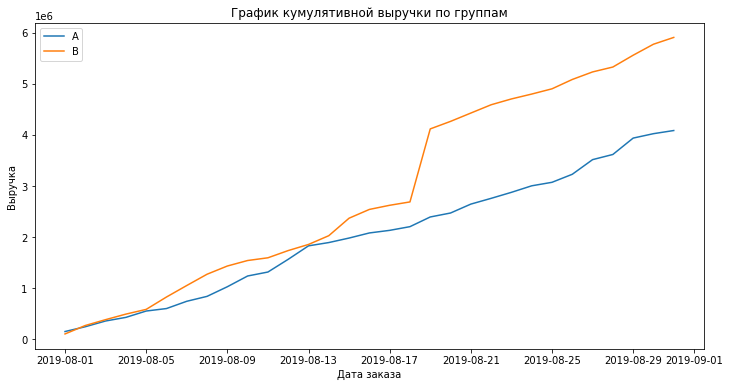

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.ylabel('Выручка')
plt.xlabel('Дата заказа')
plt.title('График кумулятивной выручки по группам');

Группа В стабильно имеет преимущество перед группой А, особенно выделяется скачок роста во второй половине теста. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы следует проанализировать отдельно и возможно, удалить, чтобы не искажать результаты теста.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

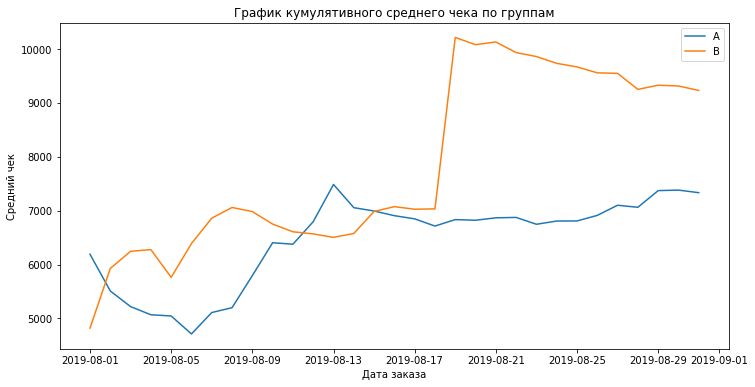

In [21]:
# разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.ylabel('Средний чек')
plt.xlabel('Дата заказа')
plt.title('График кумулятивного среднего чека по группам');

Кумулятивное значение среднего чека по группам сильно колеблется, но становится более равномерным ближе к концу теста.  Также, как и на прошлом графике, наблюдается резкий скачок роста среднего чека в группе В 2019-08-17, что свидетельствует о появлении очень дорогих заказов в выборке. И скачок суммы среднего чека в группе А 2019-08-13. Анализ выбросов необходим.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

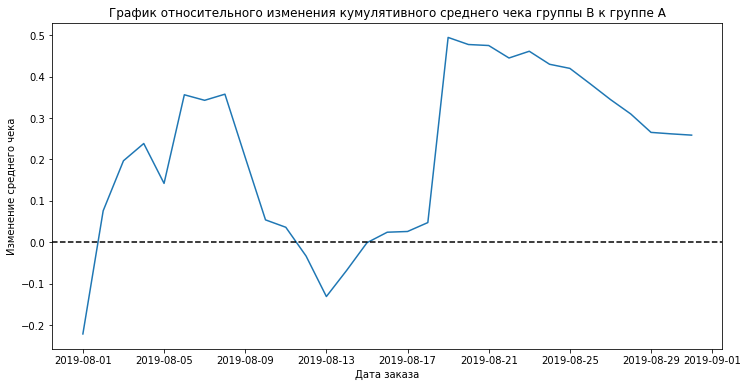

In [22]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Изменение среднего чека')
plt.xlabel('Дата заказа')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');

В нескольких точках график различия между сегментами резко «скачет». Видимо, именно тогда были совершены аномальные заказы.

### Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.

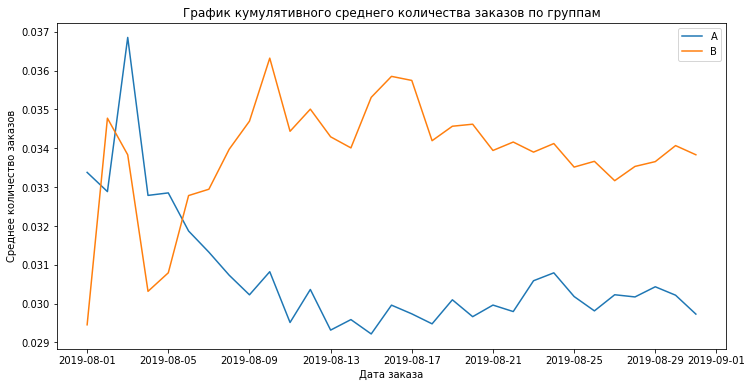

In [23]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.ylabel('Среднее количество заказов')
plt.xlabel('Дата заказа')
plt.title('График кумулятивного среднего количества заказов по группам');

В первые дни мы видим значительные колебания отношения кол-ва заказов к посещениям в обеих группах. Но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

### Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.

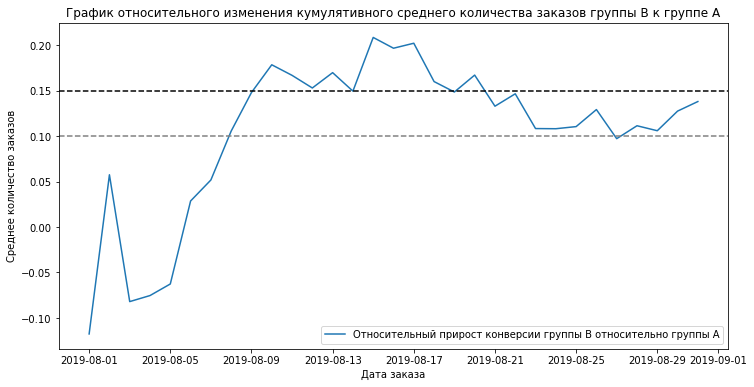

In [24]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0.15, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.ylabel('Среднее количество заказов')
plt.xlabel('Дата заказа')
plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A');

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Потом её конверсия постепенно пошла на спад, но осталась в пределах положительного прироста, не менее 10% относительно группы А.

В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [25]:
ordersByUsers = (
     orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['visitorid', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


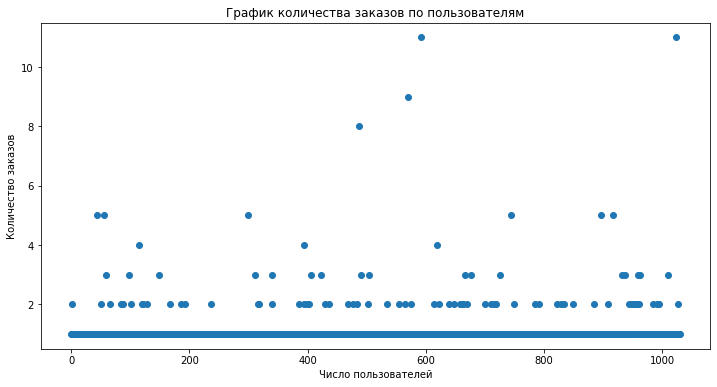

In [26]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(12, 6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Количество заказов')
plt.xlabel('Число пользователей')
plt.title('График количества заказов по пользователям');

По графику видно, что пользователей, оформивших заказ 3 и более раз - единицы. Основная масса пользователей делала заказ 1 раз.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [27]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше 2-х заказов. И всего 1% пользователей заказывали более 4-х раз.
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

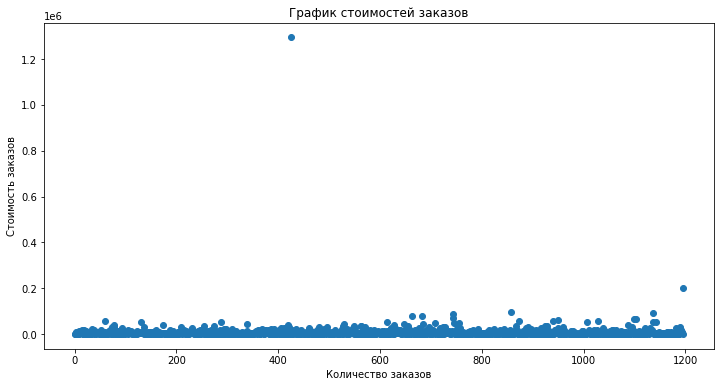

In [28]:
y_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(12, 6))
plt.scatter(y_values, orders['revenue'])
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество заказов')
plt.title('График стоимостей заказов');

Основная масса заказов имеет стоимость менее 200 000. Есть единичные выбросы со стоимостью выше 200 000 и один заказ с аномальной стоимостью свыше 1 200 000, скорее всего, ошибочное значение. Из-за такого единственного выброса график малоинформативен, так как все остальные значения сгруппированы практически в единую массу.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [29]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более, чем у 5% заказов, чек дороже 28 000 и всего у 1% заказов - дороже 58 000. Можно выбрать в качестве верхней границы стоимости заказов - 28 000 и отсеять аномальных пользователей по ней.

### Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезы. 


**Нулевая:** различий в среднем количестве заказов между группами нет. 

**Альтернативная:** различия в среднем количестве заказов между группами есть.

Начнём с подготовки данных:

In [30]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [31]:
# для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

In [32]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value =',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего числа заказов группы B =',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительный прирост среднего числа заказов группы B = 0.138


P-value < 0.05, значит нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов между группами нет, отвергаем. Анализ "сырых" данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к среднему группы А равен 13,8%.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 

**Нулевая гипотеза:** различий в среднем чеке между группами нет. 

**Альтернативная гипотеза:** различия в среднем чеке между группами есть.

In [33]:
print('p-value','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B =', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value 0.729
Относительный прирост среднего чека группы B = 0.259


P-value > 0.05, значит статистически значимых отличий в среднем чеке между группами нет. При этом относительное различие среднего чека между сегментами очень большое (25,9%). 

Такое различие может быть вызвано выбросами аномально высокой стоимости заказов, следует "очистить" данные от таких выбросов и сравнить результат.

### Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.

Как мы выяснили ранее, не более, чем у 5% заказов, чек дороже 28 000 и не более 5% пользователей оформляли больше 2-х заказов. Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей.

In [34]:
max_orders = 2
max_revenue = 28000
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > max_orders]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > max_orders]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > max_revenue]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorid, dtype: int64
74


Всего 74 аномальных пользователя. 

Теперь узнаем, как их действия повлияли на результаты теста, в котором мы рассматривали следующие гипотезы:
    

**Нулевая:** различий в среднем количестве заказов между группами нет. 

**Альтернативная:** различия в среднем количестве заказов между группами есть.

In [35]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [36]:
print('p-value','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B =','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


p-value 0.013
Относительный прирост среднего числа заказов группы B = 0.173


Результаты по среднему количеству заказов практически не изменились. P-value < 0.05, значит в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к среднему группы А равен 17,3%, что также не сильно отличается от показателея по "сырым" данным (13,8%).

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Проверим статистическую значимость различий в среднем чеке между сегментами по "очищенным" данным.

**Нулевая гипотеза:** различий в среднем чеке между группами нет. 

**Альтернативная гипотеза:** различия в среднем чеке между группами есть.<b>

In [37]:
print('p-value',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека группы B =',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value 0.738
Относительный прирост среднего чека группы B = -0.020


Значение P-value > 0.05, как и по "сырым" данным, значит статистически значимых отличий в среднем чеке между группами нет. При этом относительное различие среднего чека между сегментами стало отрицательным, то есть группа В теперь проигрывает на 2% группе А. По сырым данным группа В опережала группу А почти на 26%. Таким образом, аномалии в суммах среднего чека достаточно сильно повлияли на результаты A/B-теста.


### Примите решение по результатам теста и объясните его. 

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 

2. Остановить тест, зафиксировать отсутствие различий между группами. 

3. Продолжить тест.


- Имеется статистически значимое различие по среднему количеству заказов между группами А и В и по «сырым», и по данным после фильтрации аномалий;
- нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- график различия кумулятивной конверсии между группами сообщает, что результаты группы B лучше результатов группы A и относительный прирост среднего числа заказов группы B подтверждает данный вывод;
- график различия кумулятивного среднего чека  между группами А и В говорит о том, что "сырые" данные содержат аномальные значения. При подсчете значения относительного прироста среднего чека группы B по "очищенным" данным выяснилось, что он практически не отличается от среднего чека группы А (отстает на 2%).


Исходя из обнаруженных фактов, тест следует остановить и признать победу группы В. Хоть средний чек по группам и не изменился, но возросла конверсия, а значит и увеличилось количество заказов.